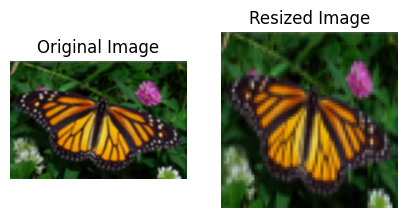

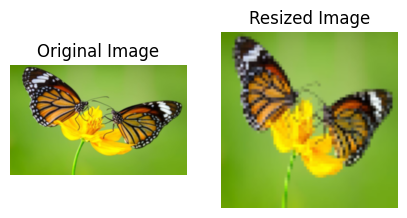

In [48]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def preprocess_images(image_paths, target_size=(64, 64), sigma=1):
    processed_images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.GaussianBlur(img, (5, 5), 10)
        if img is not None:
            plt.figure(figsize=(5, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')

            img_blurred = cv2.GaussianBlur(img, (5, 5), sigma)

            img_resized = cv2.resize(img_blurred, target_size)

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
            plt.title("Resized Image")
            plt.axis('off')

            plt.show()

            processed_images.append(img_resized)
    return processed_images

folder_path = '/content/drive/MyDrive/CV_Assignments/Assignment_2/cvasg2'

image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

processed_images = preprocess_images(image_files)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 6 clusters: 0.47366588198243287
Silhouette Score for Spectral Clustering 6 clusters: 0.568337774536052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 3 clusters: 0.6613227774901779
Silhouette Score for Spectral Clustering 3 clusters: 0.6645038518326882


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K-means Clustering 6 clusters: 0.5256502548921123
Silhouette Score for Spectral Clustering 6 clusters: 0.53993280315558


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 3 clusters: 0.6027144724775256
Silhouette Score for Spectral Clustering 3 clusters: 0.5898114717755776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


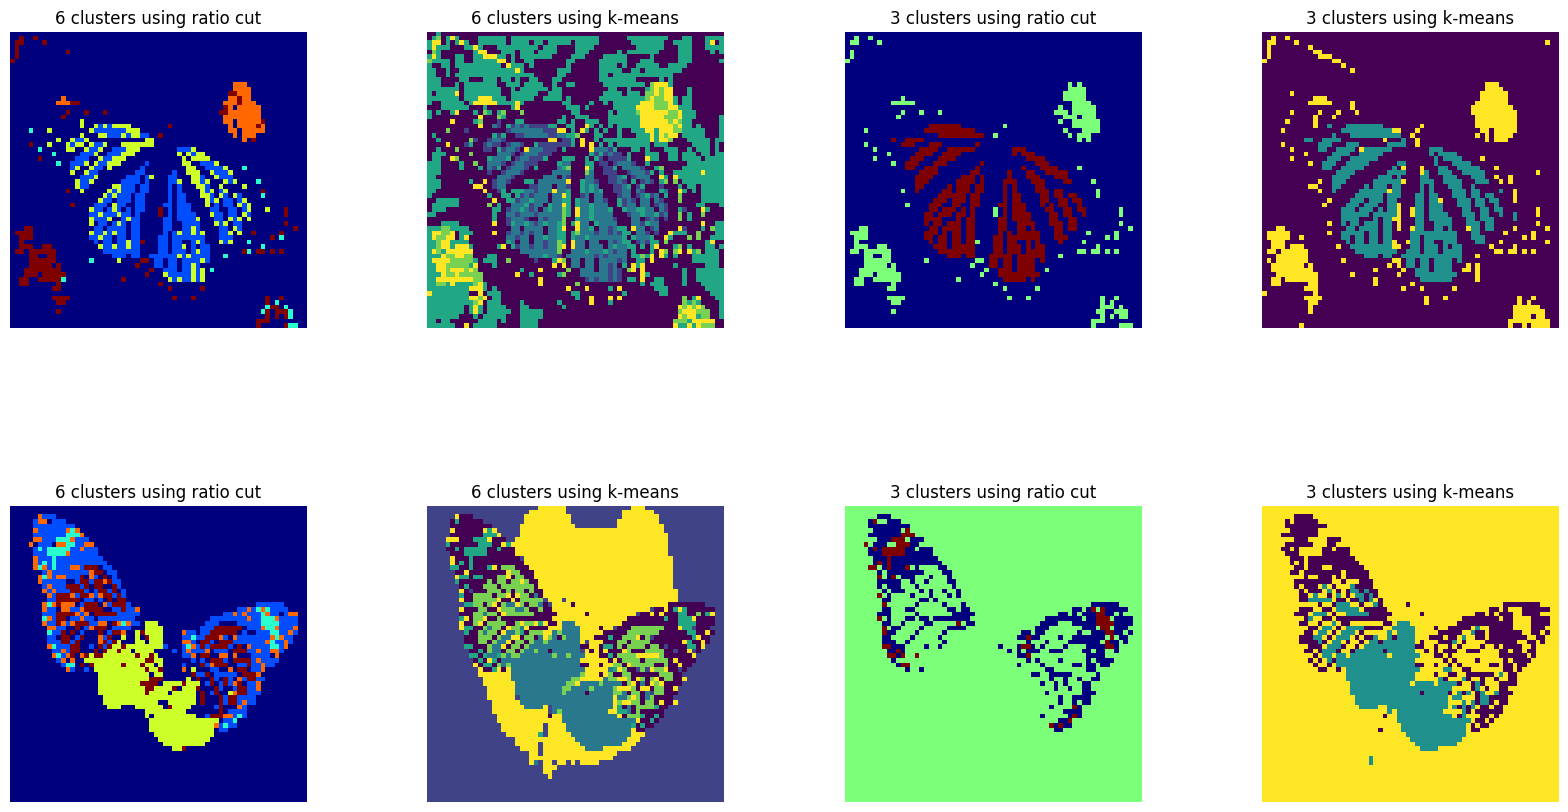

In [17]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

class ImageSegmenter:
    def __init__(self, k=3, sigma=1.0, target_size=(64, 64)):
        self.k = k
        self.sigma = sigma
        self.target_size = target_size

    def preprocess_image(self, image_path):
        img = cv2.imread(image_path)
        if img is not None:
            img_resized = cv2.resize(img, self.target_size)
            return img_resized
        return None

    def compute_similarity_matrix(self, pixels):
        pairwise_dist = pairwise_distances(pixels, metric='euclidean')
        return np.exp(-pairwise_dist ** 2 / (2 * self.sigma ** 2))

    def compute_laplacian_matrix(self, similarity_matrix):
      degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
      inv_sqrt_deg = np.diag(1.0 / np.sqrt(np.diag(degree_matrix)))
      laplacian_matrix = np.eye(*similarity_matrix.shape) - inv_sqrt_deg @ similarity_matrix @ inv_sqrt_deg
      return laplacian_matrix


    def perform_spectral_decomposition(self, laplacian_matrix):
        _, eigenvectors = np.linalg.eigh(laplacian_matrix)
        return eigenvectors[:, 1:self.k+1]


    def cluster_pixels(self, eigenvectors):
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(eigenvectors)
        return kmeans.labels_

    def segment_image(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        similarity_matrix = self.compute_similarity_matrix(pixels)
        laplacian_matrix = self.compute_laplacian_matrix(similarity_matrix)
        eigenvectors = self.perform_spectral_decomposition(laplacian_matrix)
        labels = self.cluster_pixels(eigenvectors)
        return labels.reshape(img.shape[:2]), pixels

    def k_means_clustering(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        kmeans = KMeans(n_clusters=self.k, random_state=0).fit(pixels)
        return kmeans.labels_.reshape(img.shape[:2]), pixels, kmeans.labels_

    def calculate_silhouette_scores(self, image_path):
        labels_kmeans, pixels, flat_labels_kmeans = self.k_means_clustering(image_path)
        segmented_labels, _ = self.segment_image(image_path)
        score_kmeans = silhouette_score(pixels, flat_labels_kmeans)
        score_spectral = silhouette_score(pixels, segmented_labels.flatten())
        return score_kmeans, score_spectral

    def display_comparative_results(self, image_path):
        score_kmeans, score_spectral = self.calculate_silhouette_scores(image_path)
        print(f"Silhouette Score for K-means Clustering {self.k} clusters: {score_kmeans}")
        print(f"Silhouette Score for Spectral Clustering {self.k} clusters: {score_spectral}")

folder_path = '/content/drive/MyDrive/CV_Assignments/Assignment_2/cvasg2'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

segmenter = ImageSegmenter(k=6, sigma=20, target_size=(64, 64))
segmenter_3 = ImageSegmenter(k=3, sigma=20, target_size=(64, 64))
plt.figure(figsize=(20, 10))

for i, image_path in enumerate(image_files):
    segmenter.display_comparative_results(image_path)
    segmenter_3.display_comparative_results(image_path)
    segmented_labels, _ = segmenter.segment_image(image_path)
    k_means_labels, _, _ = segmenter.k_means_clustering(image_path)
    segmented_labels_3, _ = segmenter_3.segment_image(image_path)
    k_means_labels_3, _, _ = segmenter_3.k_means_clustering(image_path)

    plt.subplot(2, 4, 1 + 4 * i)
    plt.imshow(segmented_labels, cmap="jet")
    plt.title("{} clusters using ratio cut".format(segmenter.k))
    plt.axis('off')

    plt.subplot(2, 4, 2 + 4 * i)
    plt.imshow(k_means_labels)
    plt.title("{} clusters using k-means".format(segmenter.k))
    plt.axis('off')

    plt.subplot(2, 4, 3 + 4 * i)
    plt.imshow(segmented_labels_3, cmap="jet")
    plt.title("{} clusters using ratio cut".format(segmenter_3.k))
    plt.axis('off')

    plt.subplot(2, 4, 4 + 4 * i)
    plt.imshow(k_means_labels_3)
    plt.title("{} clusters using k-means".format(segmenter_3.k))
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


## Final

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 6 clusters: 0.47366588198243287
Silhouette Score for Spectral Clustering 6 clusters: 0.6613449499623232


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 3 clusters: 0.6613227774901779
Silhouette Score for Spectral Clustering 3 clusters: 0.6265472622683039


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K-means Clustering 6 clusters: 0.5256502548921123
Silhouette Score for Spectral Clustering 6 clusters: 0.6070923351094775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 3 clusters: 0.6027144724775256
Silhouette Score for Spectral Clustering 3 clusters: 0.6020130695845833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


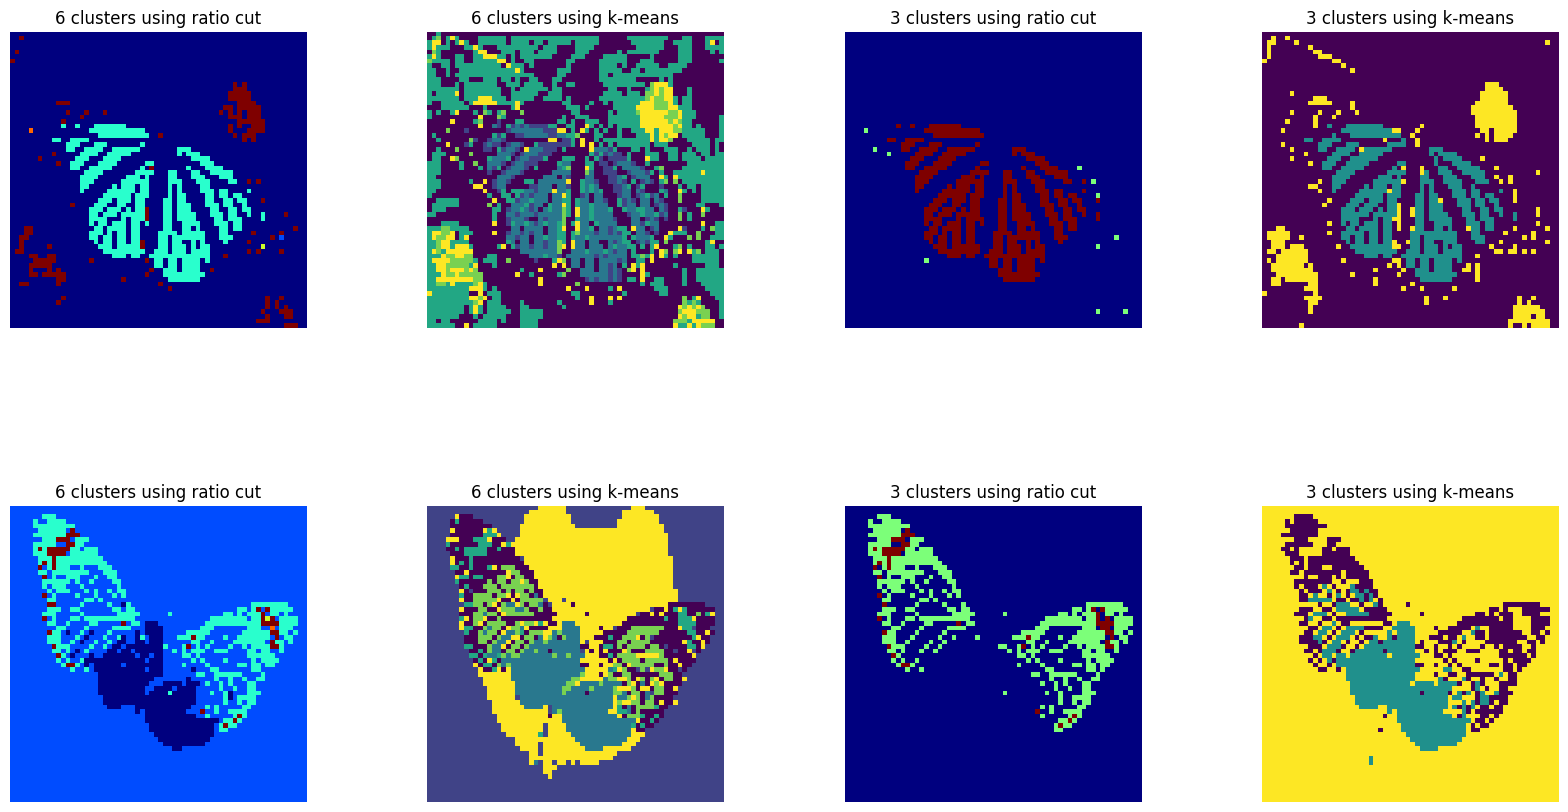

In [24]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

class ImageSegmenter:
    def __init__(self, k=3, sigma=1.0, target_size=(64, 64)):
        self.k = k
        self.sigma = sigma
        self.target_size = target_size

    def preprocess_image(self, image_path):
        img = cv2.imread(image_path)
        if img is not None:
            img_resized = cv2.resize(img, self.target_size)
            return img_resized
        return None

    def compute_similarity_matrix(self, pixels):
        pairwise_dist = pairwise_distances(pixels, metric='euclidean')
        return np.exp(-pairwise_dist ** 2 / (2 * self.sigma ** 2))

    def compute_laplacian_matrix(self, similarity_matrix):
        degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
        return degree_matrix - similarity_matrix


    def perform_spectral_decomposition(self, laplacian_matrix):
        _, eigenvectors = np.linalg.eigh(laplacian_matrix)
        return eigenvectors[:, 1:self.k+1]

    def cluster_pixels(self, eigenvectors):
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(eigenvectors)
        return kmeans.labels_

    def segment_image(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        similarity_matrix = self.compute_similarity_matrix(pixels)
        laplacian_matrix = self.compute_laplacian_matrix(similarity_matrix)
        eigenvectors = self.perform_spectral_decomposition(laplacian_matrix)
        labels = self.cluster_pixels(eigenvectors)
        return labels.reshape(img.shape[:2]), pixels

    def k_means_clustering(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        kmeans = KMeans(n_clusters=self.k, random_state=0).fit(pixels)
        return kmeans.labels_.reshape(img.shape[:2]), pixels, kmeans.labels_

    def calculate_silhouette_scores(self, image_path):
        labels_kmeans, pixels, flat_labels_kmeans = self.k_means_clustering(image_path)
        segmented_labels, _ = self.segment_image(image_path)
        score_kmeans = silhouette_score(pixels, flat_labels_kmeans)
        score_spectral = silhouette_score(pixels, segmented_labels.flatten())
        return score_kmeans, score_spectral

    def display_comparative_results(self, image_path):
        score_kmeans, score_spectral = self.calculate_silhouette_scores(image_path)
        print(f"Silhouette Score for K-means Clustering {self.k} clusters: {score_kmeans}")
        print(f"Silhouette Score for Spectral Clustering {self.k} clusters: {score_spectral}")

folder_path = '/content/drive/MyDrive/CV_Assignments/Assignment_2/cvasg2'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

segmenter = ImageSegmenter(k=6, sigma=40, target_size=(64, 64))
segmenter_3 = ImageSegmenter(k=3, sigma=40, target_size=(64, 64))
plt.figure(figsize=(20, 10))

for i, image_path in enumerate(image_files):
    segmenter.display_comparative_results(image_path)
    segmenter_3.display_comparative_results(image_path)
    segmented_labels, _ = segmenter.segment_image(image_path)
    k_means_labels, _, _ = segmenter.k_means_clustering(image_path)
    segmented_labels_3, _ = segmenter_3.segment_image(image_path)
    k_means_labels_3, _, _ = segmenter_3.k_means_clustering(image_path)

    plt.subplot(2, 4, 1 + 4 * i)
    plt.imshow(segmented_labels, cmap="jet")
    plt.title("{} clusters using ratio cut".format(segmenter.k))
    plt.axis('off')

    plt.subplot(2, 4, 2 + 4 * i)
    plt.imshow(k_means_labels)
    plt.title("{} clusters using k-means".format(segmenter.k))
    plt.axis('off')

    plt.subplot(2, 4, 3 + 4 * i)
    plt.imshow(segmented_labels_3, cmap="jet")
    plt.title("{} clusters using ratio cut".format(segmenter_3.k))
    plt.axis('off')

    plt.subplot(2, 4, 4 + 4 * i)
    plt.imshow(k_means_labels_3)
    plt.title("{} clusters using k-means".format(segmenter_3.k))
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


## Fine- Tunning Sigma

In [22]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

class ImageSegmenter:
    def __init__(self, k=3, sigma=1.0, target_size=(64, 64)):
        self.k = k
        self.sigma = sigma
        self.target_size = target_size

    def preprocess_image(self, image_path):
        img = cv2.imread(image_path)
        if img is not None:
            img_resized = cv2.resize(img, self.target_size)
            return img_resized
        return None

    def compute_similarity_matrix(self, pixels):
        pairwise_dist = pairwise_distances(pixels, metric='euclidean')
        return np.exp(-pairwise_dist ** 2 / (2 * self.sigma ** 2))

    def compute_laplacian_matrix(self, similarity_matrix):
        degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
        return degree_matrix - similarity_matrix


    def perform_spectral_decomposition(self, laplacian_matrix):
        _, eigenvectors = np.linalg.eigh(laplacian_matrix)
        return eigenvectors[:, 1:self.k+1]


    def cluster_pixels(self, eigenvectors):
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(eigenvectors)
        return kmeans.labels_

    def segment_image(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        similarity_matrix = self.compute_similarity_matrix(pixels)
        laplacian_matrix = self.compute_laplacian_matrix(similarity_matrix)
        eigenvectors = self.perform_spectral_decomposition(laplacian_matrix)
        labels = self.cluster_pixels(eigenvectors)
        return labels.reshape(img.shape[:2]), pixels

    def k_means_clustering(self, image_path):
        img = self.preprocess_image(image_path)
        if img is None:
            return None
        pixels = img.reshape(-1, 3)
        kmeans = KMeans(n_clusters=self.k, random_state=0).fit(pixels)
        return kmeans.labels_.reshape(img.shape[:2]), pixels, kmeans.labels_

    def calculate_silhouette_scores(self, image_path):
        labels_kmeans, pixels, flat_labels_kmeans = self.k_means_clustering(image_path)
        segmented_labels, _ = self.segment_image(image_path)
        score_kmeans = silhouette_score(pixels, flat_labels_kmeans)
        score_spectral = silhouette_score(pixels, segmented_labels.flatten())
        return score_kmeans, score_spectral

    def display_comparative_results(self, image_path):
        score_kmeans, score_spectral = self.calculate_silhouette_scores(image_path)
        print(f"Silhouette Score for K-means Clustering {self.k} clusters: {score_kmeans}")
        print(f"Silhouette Score for Spectral Clustering {self.k} clusters: {score_spectral}")

    def tune_sigma(self, image_path, sigma_values):
      best_sigma = None
      best_score = -1
      original_sigma = self.sigma
      for sigma in sigma_values:
          self.sigma = sigma
          try:
              segmented_labels, pixels = self.segment_image(image_path)
              if segmented_labels is None or pixels is None:
                  continue
              score = silhouette_score(pixels, segmented_labels.flatten())
              print(f"Testing sigma={sigma}: Silhouette Score = {score}")
              if score > best_score:
                  best_score = score
                  best_sigma = sigma
          except Exception as e:
              print(f"An error occurred with sigma={sigma}: {e}")

      self.sigma = original_sigma

      if best_sigma is not None:
          print(f"Best sigma={best_sigma} with Silhouette Score={best_score}")
      else:
          print("No valid sigma found that improves the score")

      return best_sigma


folder_path = '/content/drive/MyDrive/CV_Assignments/Assignment_2/cvasg2'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

segmenter = ImageSegmenter(k=6, sigma=25, target_size=(64, 64))
segmenter_3 = ImageSegmenter(k=3, sigma=25, target_size=(64, 64))





In [23]:
sigma_values = np.linspace(10, 50, num=5)

best_sigma = segmenter.tune_sigma(image_path, sigma_values)

if best_sigma is not None:
    segmenter.sigma = best_sigma

segmenter.display_comparative_results(image_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing sigma=10.0: Silhouette Score = 0.48426049825969175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing sigma=20.0: Silhouette Score = 0.5557093466893025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing sigma=30.0: Silhouette Score = 0.5893767275498243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing sigma=40.0: Silhouette Score = 0.6070923351094775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing sigma=50.0: Silhouette Score = 0.5906999229833951
Best sigma=40.0 with Silhouette Score=0.6070923351094775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means Clustering 6 clusters: 0.5256502548921123
Silhouette Score for Spectral Clustering 6 clusters: 0.6070923351094775
